# Polynomial Regression

## A linear graph of averages 
Recall the graph of averages from the Simple Regression notebook.

In [1]:
%pylab inline
import pandas as pd
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


In [2]:
HW=pd.read_csv('../data/HW25000.csv')
HW=HW.iloc[:,1:]
HW.columns=['Height','Weight']
HW.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [3]:
A=np.array(HW['Height'])
A=np.array([ones(len(A)),A])
y=np.array(HW['Weight'])

w1 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print 'w1=',w1
def f(x,w):
    return w[0]+w[1]*x

w1= [-82.57574306   3.08347645]


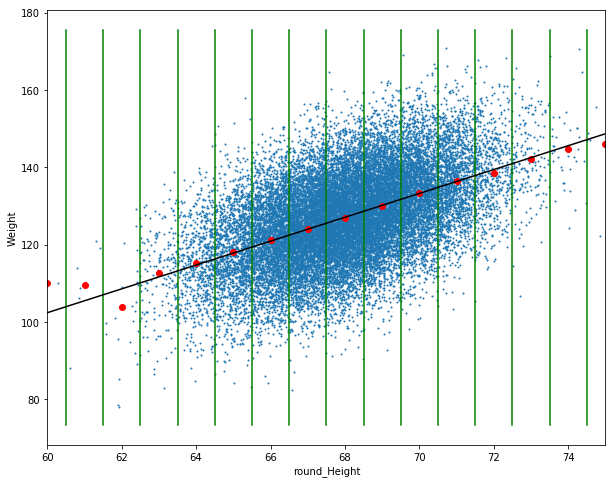

In [4]:
def Average_Plot(df,x_name,y_name):
    # calculate the mean weight for each 1-inch interval of height.
    df['round_'+x_name]=df[x_name].round()

    per_height_means=df.groupby('round_'+x_name).mean()[[y_name]]

    ax=df.plot(kind='scatter',s=1,x=x_name,y=y_name,figsize=[10,8]);
    per_height_means.plot(y=y_name,style='ro',ax=ax,legend=False)

    _xlim=xlim()
    _ylim=ylim()
    for _x in arange(_xlim[0]+0.5,_xlim[1],1):
        ax.plot([_x,_x],[_ylim[0],_ylim[1]],'g')
    return ax
ax=Average_Plot(HW,'Height','Weight');
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k');

## non-linear graph of averages
Suppose we have data for which the averages do not fall close to a straight line.

In [5]:
HW['P2']=HW['Weight']+(HW['Height']-68)**2

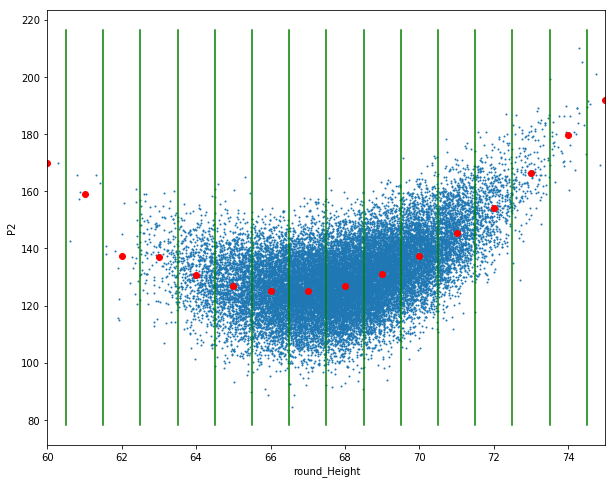

In [6]:
ax=Average_Plot(HW,'Height','P2');

### The limits of linear regression
We **can** use linear regression for this data, but the fit will be poor.

In [17]:
A=np.array(HW['Height'])
A=np.array([ones(len(A)),A])
y=np.array(HW['P2'])

w1 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print 'w1=',w1

w1= [-77.29147795   3.05894484]


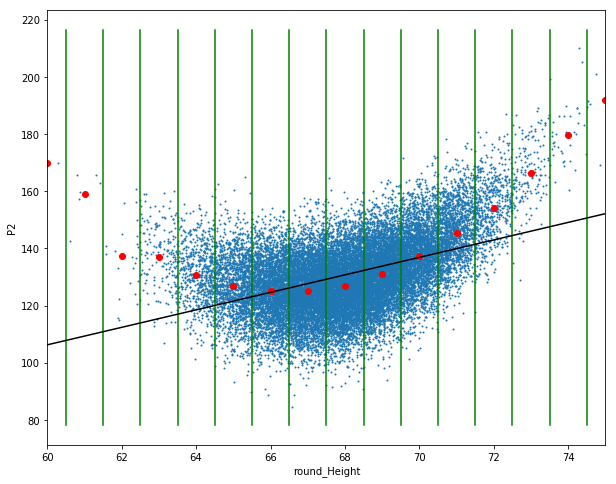

In [18]:
def f(x,w):
    return w[0]+w[1]*x
ax=Average_Plot(HW,'Height','P2');
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k');

### Lets try a second degree polynomial

A second degree polynomial can be expressed in the form 
$$f_2(x)=w_0+w_1 x + w_2 x^2 $$

We find the parameters $w_0,w_1,w_2$ that minimize the root-mean-square error.

In [8]:
A=np.array(HW['Height'])
A=np.array([ones(len(A)),A,A**2])
y=np.array(HW['P2'])

w2 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print 'w2=',w2
def f2(x,w):
    return w[0]+w[1]*x+w[2]*x**2

w2= [  4.57718628e+03  -1.33969361e+02   1.00774285e+00]


### The second degree polynomial is a pretty good fit

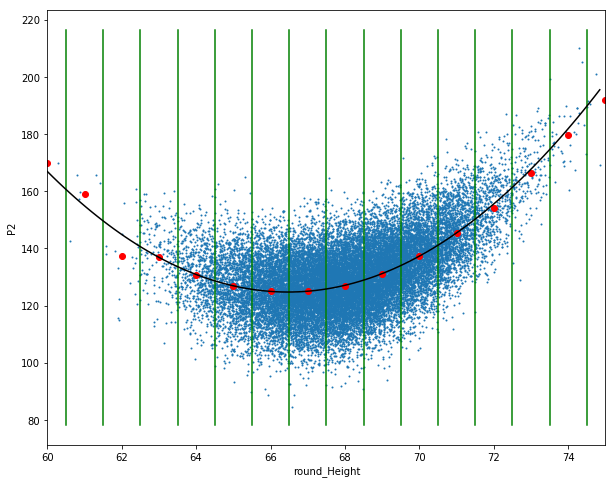

In [9]:
ax=Average_Plot(HW,'Height','P2')
_xmin,_xmax=xlim()
_xrange=_xmax-_xmin
X=arange(_xmin,_xmax,_xrange/100.)
Y=f2(X,w2)
ax.plot(X,f2(X,w2),'k');

## Over-fitting, Under-fitting and Model selection
* often we don't know what degree polynomial to use for our data.
* Finding the degree is a special case of "Model selection"

In [10]:
# A function for computing a polynomial of an arbitrary degree
# The degree is determined by the length of the parameter vector w
def F(X,w):
    Accum=w[0]*np.ones(len(X))
    for i in range(1,len(w)):
        Accum+=w[i]*X**i
    return Accum
        

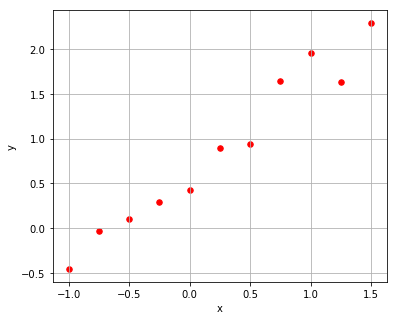

In [11]:
np.random.seed(0)
X=np.arange(-1,1.6,0.25)
Y=X+np.random.rand(len(X))
Y

Data=pd.DataFrame({'x':X,
                   'y':Y})
ax=Data.plot(kind='scatter',s=30,c='r',x='x',y='y',figsize=[6,5]);
grid()

### Model selection cannot be done by minimizing training error
* If we measure the error on the same dataset that was used to minimize the error, then higher degree is always at least as good.
* Given any $n$ points, there is a degree $n-1$ polynomial that goes through all $n$ points.

### Training error and test error
* To do Model Selection, we split the dataset into two parts: 
 * A training set: used to find the best polynomial
 * A test set: used to find the best degree for the polynomial (model).
* For each polynomial degree, minimize the **train RMS error** then compute the **test RMS error**.
* Use the degree that minimizes the **test RMS error**

In [12]:
L=len(X)
split=[0,1]*L
Data['split']=split[:L]

In [19]:
def polyfit(ax,d=8):
    Train=Data[Data['split']==1]
    Test=Data[Data['split']==0]
    
    A=np.array([Train['x']])
    D=np.ones([1,A.shape[1]])
    for i in range(1,d+1):
        D=np.concatenate([D,A**i])
    w=linalg.lstsq(D.T,Train['y'])[0]
    train_RMS=sqrt(mean((Train['y']-F(Train['x'],w))**2))
    test_RMS=sqrt(mean((Test['y']-F(Test['x'],w))**2))

    Train.plot(kind='scatter',s=30,c='b',x='x',y='y',ax=ax,label='Train');
    Test.plot(kind='scatter',s=30,c='r',x='x',y='y',ax=ax,label='Test');
    grid()
    legend()
    _xmin,_xmax=plt.xlim()
    _xrange=_xmax-_xmin
    X=arange(_xmin,_xmax,_xrange/100.)
    ax.plot(X,F(X,w),'k');
    plt.title('d=%d, train_RMS=%5.3f, test_RMS=%5.3f'%(d,train_RMS,test_RMS))
    return train_RMS,test_RMS

(0.041298766383521535, 0.51990534400255894)

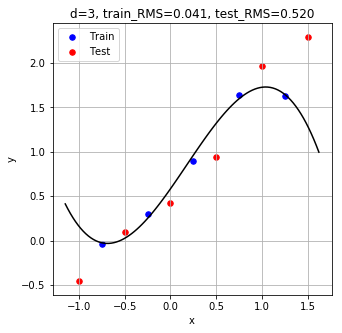

In [20]:
fig=plt.figure(figsize=[5,5])
ax=plt.subplot(111)
polyfit(ax,3)

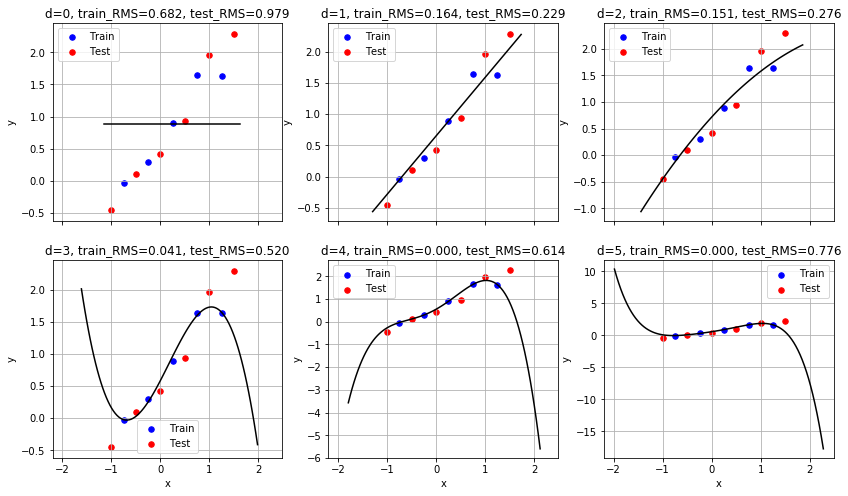

In [21]:
rows=2; cols=3; max_d=6
fig=plt.figure(figsize=[14,8])
train_RMS=np.zeros(max_d)
test_RMS=np.zeros(max_d)
for d in range(max_d):
    if d==0:
        ax=plt.subplot(rows,cols,d+1)
        ax0=ax
    else:
        ax=plt.subplot(rows,cols,d+1,sharex=ax0)
    train_RMS[d],test_RMS[d]=polyfit(ax,d)

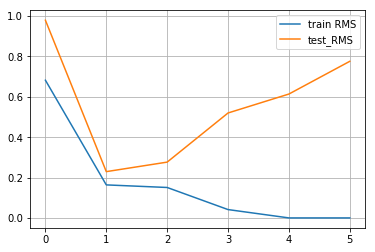

In [15]:
plot(train_RMS,label='train RMS')
plot(test_RMS,label='test_RMS')
legend()
grid()

![annotated figure](images/6_Polynomial_Regression.png)

# The End!
* Thank you for a great quarter.
* Please fill in the Teacher evaluations!

## Excercises

So far we have discussed polynomials in a **single** variable. Polynomials can be defined over several variables

Write a function that takes as input a two lists of $(x,y,z)$ points, a training set and a test set. The $x$ and $y$ values are drawn uniformly at random from the range $[0,100]$, The $z$ values are generated according to the distribution $y=g(x)+w$ where $g$ is a polynomial function whose degree is at most 10 and $w$ is independent gaussian noise.

The function should find the best fit polynomials of degrees 0 to 10 and compute for each degree the training RMS error and the test RMS error.

The function should return the polynomial which gives the best fit on the test set. For that polynomial it should return:
1. $d$ - The degree of the polinomial.
2. A vector of length $d+1$ corresponding to the coefficients $w_i$ of the polynomial, expressed as: $ \sum_{i=0}^d w_i x^i$
3. The RMS error on the training set.
4. The RMS error of the test set.

In [16]:
def fit_poly(train,test):
    """ take as input a training set and a test set and output the 
    polynomial that is the best fit."""
    






